<a href="https://colab.research.google.com/github/Nithyavaishu16/aiml-training-2024/blob/main/AIML_III_Module_4_Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Students Internship Batch of 2024
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

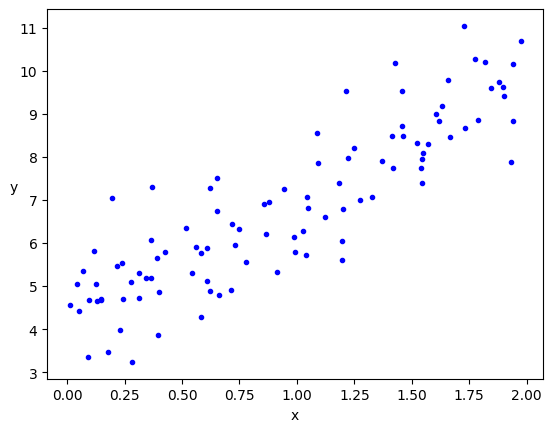

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [5]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [6]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [7]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

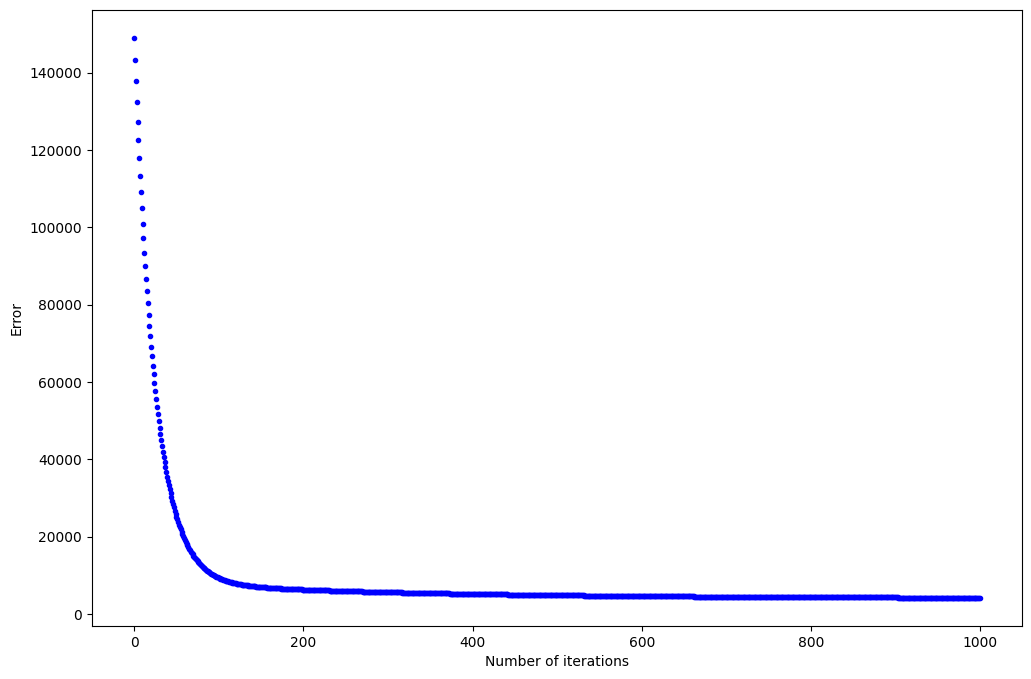

In [8]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

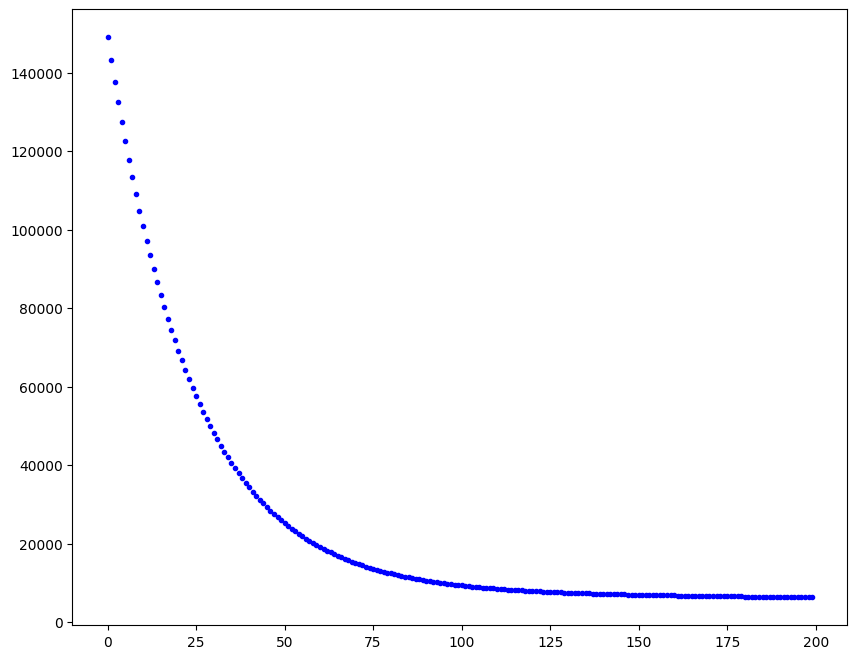

In [9]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [10]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [11]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


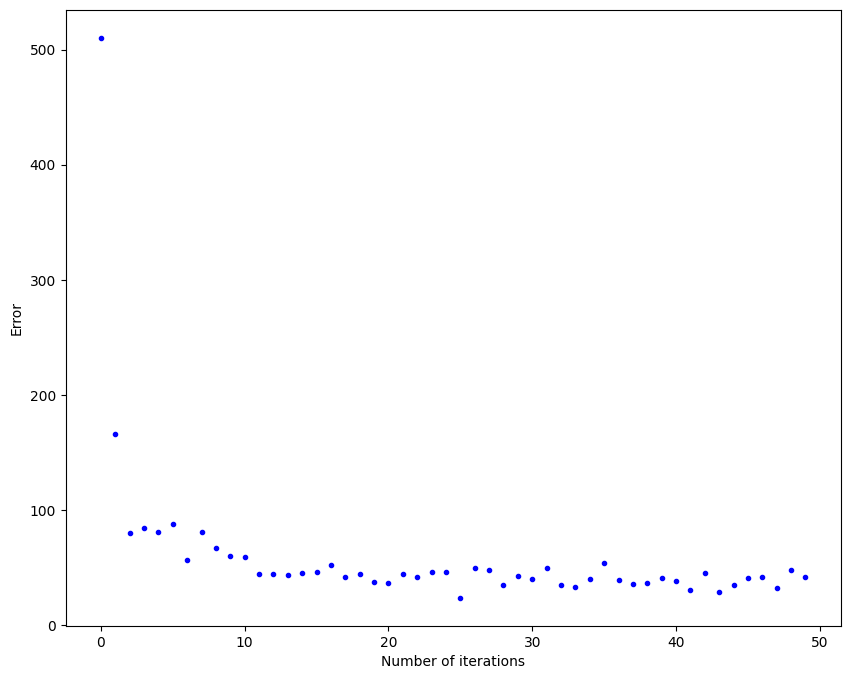

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [13]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [14]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


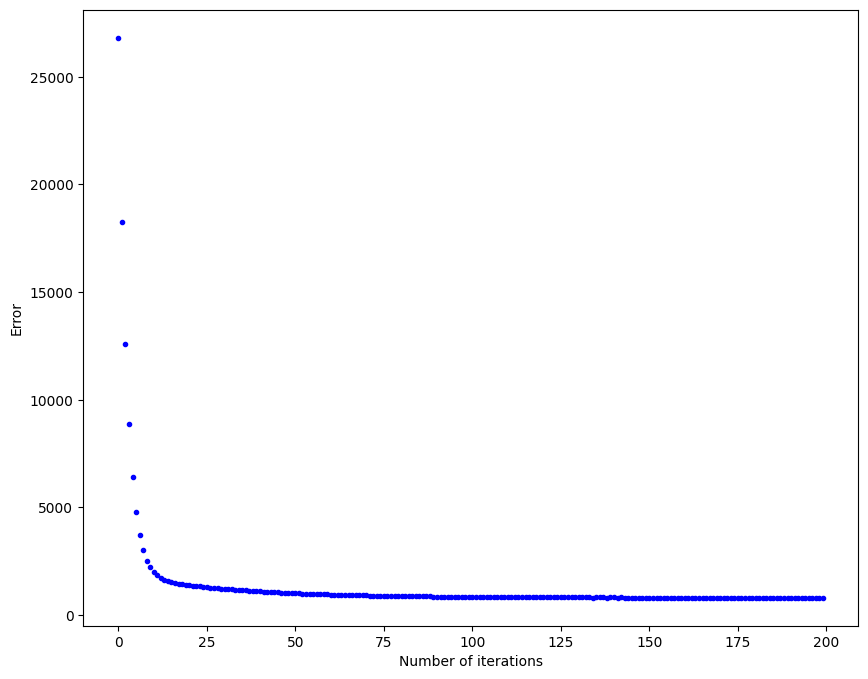

In [15]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

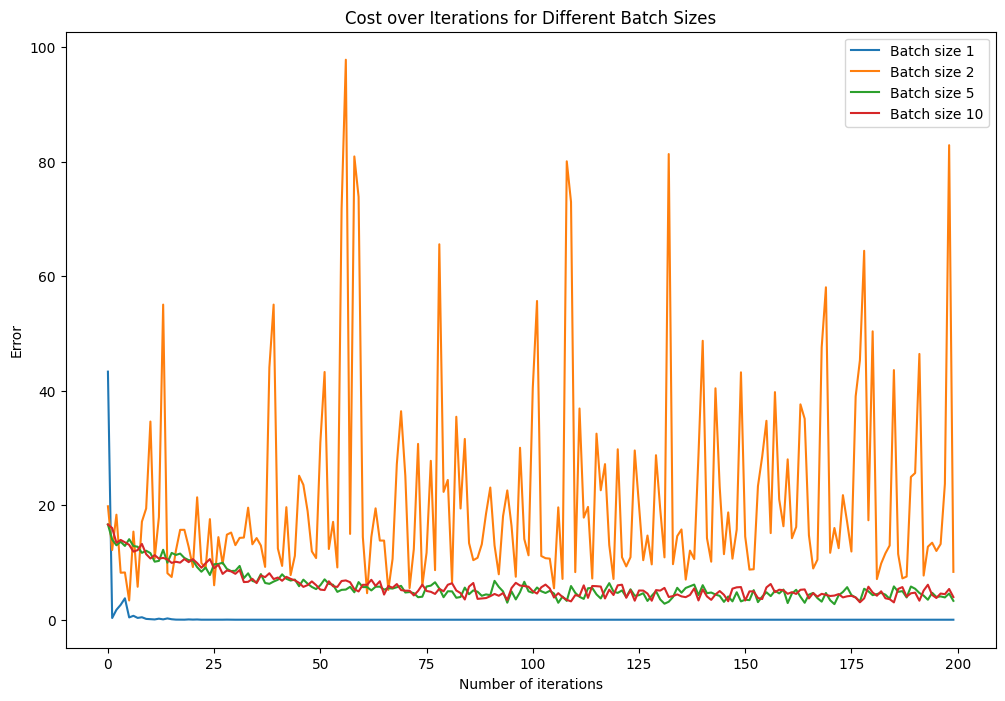

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function
def cal_cost(y_pred, X, y):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum((np.dot(X, y_pred) - y) ** 2)
    return cost

# Define minibatch gradient descent
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(np.ceil(m / batch_size))

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            # Add bias term to X_i
            X_i = np.c_[np.ones(len(X_i)), X_i]

            # Compute predictions
            prediction = np.dot(X_i, y_pred)

            # Update the parameters
            gradient = (1 / len(y_i)) * X_i.T.dot(prediction - y_i)

            # Ensure the gradient has the same shape as y_pred before subtracting
            y_pred = y_pred - learning_rate * gradient

            # Calculate and accumulate cost
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

# Example usage
X = np.array([[1], [2], [3], [4], [5]])  # Feature matrix
y = np.array([2, 4, 6, 8, 10])            # Target values

# Initialize y_pred with the correct shape (number of features + 1 for bias)
y_pred = np.random.randn(X.shape[1] + 1, 1)

# Parameters
lr = 0.1
n_iter = 200

# Test with different batch sizes
batch_sizes = [1, 2, 5, 10]

# Create a figure for plotting
fig, ax = plt.subplots(figsize=(12, 8))

for batch_size in batch_sizes:
    # Run minibatch gradient descent
    _, cost_history = minibatch_gradient_descent(X, y, y_pred, learning_rate=lr, iterations=n_iter, batch_size=batch_size)

    # Plot cost history
    ax.plot(range(n_iter), cost_history, label=f'Batch size {batch_size}')

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
ax.set_title('Cost over Iterations for Different Batch Sizes')
ax.legend()
plt.show()

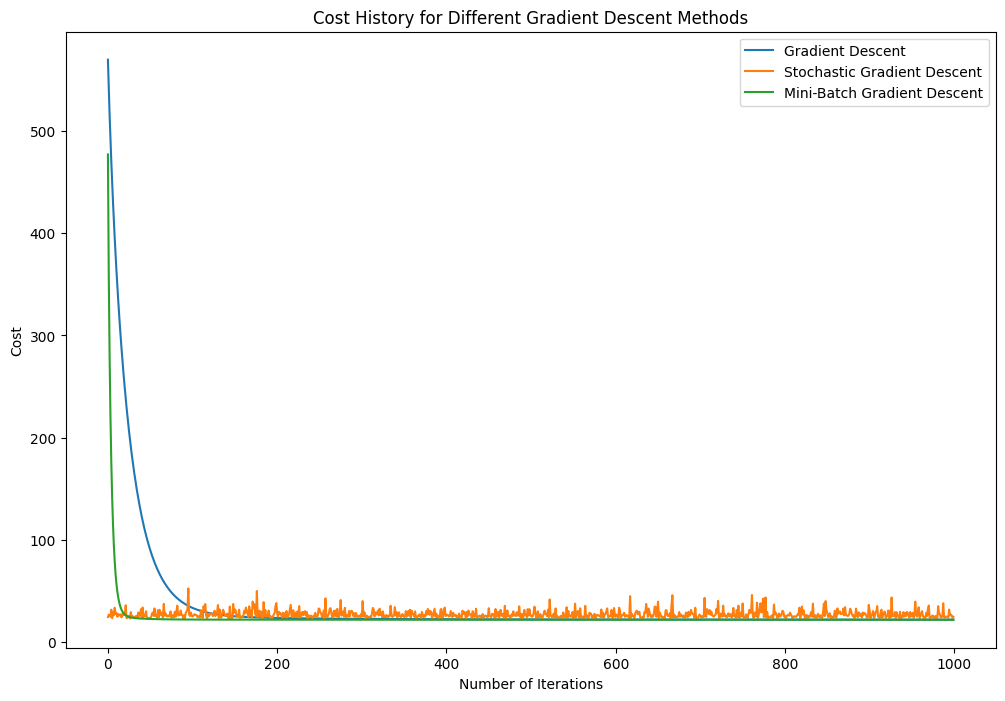

In [21]:
#2
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.datasets import load_boston # Removed this line
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd # Added this line


# Load and prepare dataset
#boston = load_boston() # Removed this line

# Load the dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data # Use data instead of boston.data
y = target # Use target instead of boston.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ... rest of the code remains the same ...
# Gradient Descent Function
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    y = y.reshape(-1, 1)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history[i] = (1/m) * np.sum((X.dot(theta) - y) ** 2)

    return theta, cost_history

# Stochastic Gradient Descent Function
def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    y = y.reshape(-1, 1)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        for j in range(m):
            rand_index = np.random.randint(m)
            X_i = X[rand_index:rand_index+1]
            y_i = y[rand_index:rand_index+1]
            gradient = 2 * X_i.T.dot(X_i.dot(theta) - y_i)
            theta -= learning_rate * gradient
        cost_history[i] = (1/m) * np.sum((X.dot(theta) - y) ** 2)

    return theta, cost_history

# Mini-Batch Gradient Descent Function
def minibatch_gradient_descent(X, y, learning_rate=0.01, iterations=1000, batch_size=32):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    y = y.reshape(-1, 1)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for j in range(0, m, batch_size):
            X_i = X[j:j+batch_size]
            y_i = y[j:j+batch_size]
            gradient = (1/batch_size) * X_i.T.dot(X_i.dot(theta) - y_i)
            theta -= learning_rate * gradient
        cost_history[i] = (1/m) * np.sum((X.dot(theta) - y) ** 2)

    return theta, cost_history

# Run gradient descent methods
lr = 0.01
iterations = 1000

theta_gd, cost_history_gd = gradient_descent(X_train, y_train, learning_rate=lr, iterations=iterations)
theta_sgd, cost_history_sgd = stochastic_gradient_descent(X_train, y_train, learning_rate=lr, iterations=iterations)
theta_mbgd, cost_history_mbgd = minibatch_gradient_descent(X_train, y_train, learning_rate=lr, iterations=iterations, batch_size=32)

# Plot cost history
plt.figure(figsize=(12, 8))
plt.plot(range(iterations), cost_history_gd, label='Gradient Descent')
plt.plot(range(iterations), cost_history_sgd, label='Stochastic Gradient Descent')
plt.plot(range(iterations), cost_history_mbgd, label='Mini-Batch Gradient Descent')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost History for Different Gradient Descent Methods')
plt.legend()
plt.show()


<ipython-input-24-7b1160bafef1>:51: RuntimeWarning: overflow encountered in square
  cost_history[i] = (1/m) * np.sum((X.dot(theta) - y) ** 2)
<ipython-input-24-7b1160bafef1>:49: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * X_i.T.dot(X_i.dot(theta) - y_i)
<ipython-input-24-7b1160bafef1>:50: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


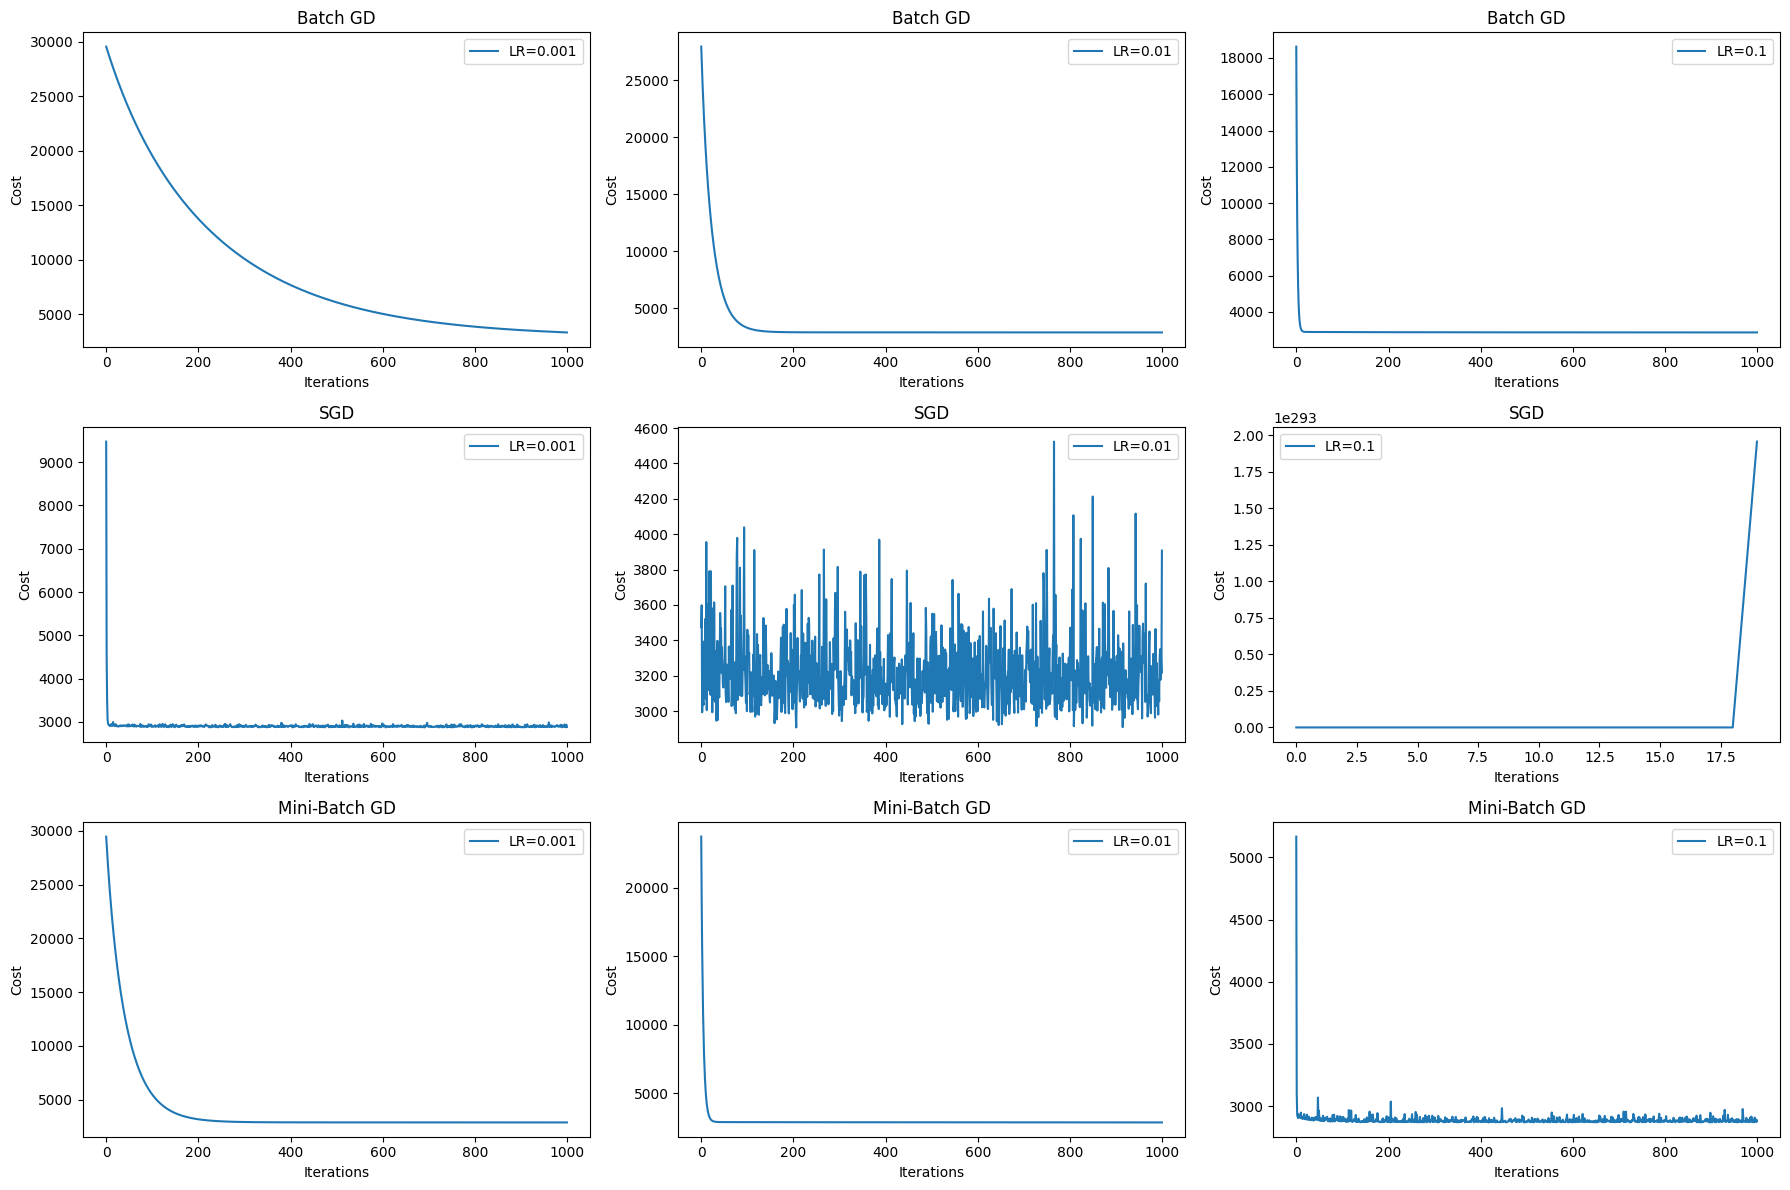

In [24]:
#3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and prepare dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Descent Function
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    y = y.reshape(-1, 1)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history[i] = (1/m) * np.sum((X.dot(theta) - y) ** 2)

    return theta, cost_history

# Stochastic Gradient Descent Function
def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    y = y.reshape(-1, 1)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        for j in range(m):
            rand_index = np.random.randint(m)
            X_i = X[rand_index:rand_index+1]
            y_i = y[rand_index:rand_index+1]
            gradient = 2 * X_i.T.dot(X_i.dot(theta) - y_i)
            theta -= learning_rate * gradient
        cost_history[i] = (1/m) * np.sum((X.dot(theta) - y) ** 2)

    return theta, cost_history

# Mini-Batch Gradient Descent Function
def minibatch_gradient_descent(X, y, learning_rate=0.01, iterations=1000, batch_size=32):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    y = y.reshape(-1, 1)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for j in range(0, m, batch_size):
            X_i = X[j:j+batch_size]
            y_i = y[j:j+batch_size]
            gradient = (1/batch_size) * X_i.T.dot(X_i.dot(theta) - y_i)
            theta -= learning_rate * gradient
        cost_history[i] = (1/m) * np.sum((X.dot(theta) - y) ** 2)

    return theta, cost_history

# Learning rates to test
learning_rates = [0.001, 0.01, 0.1]

# Initialize plots
plt.figure(figsize=(18, 12))

for lr in learning_rates:
    # Run Gradient Descent
    _, cost_history_gd = gradient_descent(X_train, y_train, learning_rate=lr, iterations=1000)

    # Run Stochastic Gradient Descent
    _, cost_history_sgd = stochastic_gradient_descent(X_train, y_train, learning_rate=lr, iterations=1000)

    # Run Mini-Batch Gradient Descent
    _, cost_history_mbgd = minibatch_gradient_descent(X_train, y_train, learning_rate=lr, iterations=1000, batch_size=32)

    # Plot cost history for Gradient Descent
    plt.subplot(3, len(learning_rates), learning_rates.index(lr) + 1)
    plt.plot(cost_history_gd, label=f'LR={lr}')
    plt.title('Batch GD')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend()

    # Plot cost history for Stochastic Gradient Descent
    plt.subplot(3, len(learning_rates), len(learning_rates) + learning_rates.index(lr) + 1)
    plt.plot(cost_history_sgd, label=f'LR={lr}')
    plt.title('SGD')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend()

    # Plot cost history for Mini-Batch Gradient Descent
    plt.subplot(3, len(learning_rates), 2*len(learning_rates) + learning_rates.index(lr) + 1)
    plt.plot(cost_history_mbgd, label=f'LR={lr}')
    plt.title('Mini-Batch GD')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend()

plt.tight_layout()
plt.show()


## **Additional Critical Thinking Question**



**Which of the following is TRUE, given the optimal learning rate?**

 (i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

 (iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

 (v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

 (vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.

ANSWERS:



1. Batch Gradient Descent is always guaranteed to converge to the global optimum of a loss function:
   - **False**. Batch gradient descent is guaranteed to converge to the global optimum for convex loss functions if the learning rate is properly chosen. However, it can converge to a local minimum for non-convex loss functions.

2. Stochastic Gradient Descent is always guaranteed to converge to the global optimum of a loss function:
   - **False**. Stochastic gradient descent (SGD) can converge to the global optimum for convex loss functions if the learning rate is appropriately managed. For non-convex functions, SGD may get stuck in local minima.

3. For convex loss functions (i.e., with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not:
   - **False**. Both batch gradient descent and stochastic gradient descent are guaranteed to converge to the global optimum for convex loss functions if the learning rate is properly managed. Batch gradient descent converges more smoothly, while stochastic gradient descent may have more fluctuations but still converges to the global optimum.

4. For convex loss functions (i.e., with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not**:
   - False. Stochastic gradient descent is not inherently better than batch gradient descent in terms of convergence to the global optimum for convex functions. Both methods can converge to the global optimum if the learning rate is appropriately managed.

5. For convex loss functions (i.e., with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum:
   - **True**. For convex loss functions, both methods are guaranteed to converge to the global optimum if the learning rate is properly managed. Batch gradient descent converges more smoothly, while stochastic gradient descent converges with more variance but still reaches the global optimum.

6. For convex loss functions (i.e., with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum:
   - **False**. For convex loss functions, both methods are guaranteed to converge to the global optimum, provided the learning rate is properly adjusted.

Correct Statement:
(v) For convex loss functions (i.e., with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.